# Interaction

Interaction is nice. I've done a bit of stuff on [D3](http://d3js.org) and it is absolutely marvellous, but different. Let's learn how to get interaction in Jupyter Notebooks, with IPython.

For sources I have the blogpost [Domino: *Interactive dashboads in Jupyter*](https://blog.dominodatalab.com/interactive-dashboards-in-jupyter/) and [the ipywidgets and jupyter-js-widgets example documentation](http://ipywidgets.readthedocs.io/en/latest/examples/Using%20Interact.html). [ipywidgets is on GitHub](https://github.com/ipython/ipywidgets).

In [17]:
import ipywidgets

For the widgets to work, the `jupyter-js-widgets` extension of Jupyter must be enabled. It brings JavaScript things to the notebooks. The following command, enables it:

    sudo jupyter nbextension enable --py --sys-prefix widgetsnbextension

Right.

The ipywidgets framework is split between UI elements and event handlers, as typical in UI stuff. Let's have a text input field, and it needs to be displayed.

In [33]:
import IPython.display

def handletext(t):
    print(t.value.upper())

textinput = ipywidgets.Text()
textinput.on_submit(handletext)
IPython.display.display(textinput)

KITTY


But the `ipywidgets.interact` object cat create the text object too, when given a string. It's an abstraction.

In [15]:
def f(x):
    return x

In [65]:
ipywidgets.interact(f, x='Hello world')

'Hello world'

<function __main__.f>

An integer value for `x` below creates a slider.

In [34]:
ipywidgets.interact(f, x=4)

4

<function __main__.f>

Whereas a boolean value for the `x` parameter of `f` creates a tickbox.

In [37]:
ipywidgets.interact(f, x=False)

False

<function __main__.f>

Alright what follows is a pretty dope interactive plotting things.

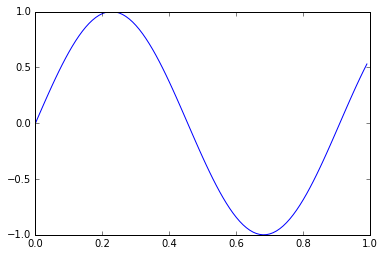

In [64]:
import scipy
import matplotlib.pyplot
%matplotlib inline

t = scipy.arange(0.0, 1.0, 0.01)

def pltsin(freq):
    matplotlib.pyplot.plot(t, scipy.sin(2*scipy.pi*t*freq))
    matplotlib.pyplot.ylim(-1, 1)
    matplotlib.pyplot.show()
    
ipywidgets.interact(pltsin, freq=(0.0, 10, 0.1))

The `interact` object can also be a decorator (remember from last summer at Gent, with PHP Zend framework?)

In [125]:
@ipywidgets.interact(s='Hello', l=4)
def strlongerthan(s:'a string', l:4): # note the function annotation
    if (len(s) > l):
        return True
    else:
        return False

True

`fixed` fixes a parameter, and won't afford interaction with it. Like so:

In [108]:
ipywidgets.interact(strlongerthan,
                    s=ipywidgets.fixed('Hello world'),
                    l=ipywidgets.IntSlider(min=0, max=15, step=3))

True

<function __main__.strlongerthan>

Lists and dicts turn to dropdowns.

In [109]:
ipywidgets.interact(strlongerthan,
                    s=('cat', 'fish', 'a giraffe'),
                    l=(0, 10)) # shorthand
                    #l=ipywidgets.IntSlider(min=0, max=10))

False

<function __main__.strlongerthan>

Something about [function annotations](https://docs.python.org/3/tutorial/controlflow.html#function-annotations); what's this, some sort of typing system for Python method/function arguments or something? Anyway, those will make interaction neat as the `interaction` object knows what to do already.

### Also the `Interactive` thing

There is also the `interactive`, which doesn't immidiately display the widget, but returns a `ipywidgets.Widget`.

In [128]:
wid = ipywidgets.interactive(strlongerthan)
print(type(wid))
wid.children

<class 'ipywidgets.widgets.widget_box.Box'>


(<ipywidgets.widgets.widget_string.Text at 0x7f5d1c037c88>,
 <ipywidgets.widgets.widget_int.IntSlider at 0x7f5d1d0da7b8>)

Such object require to be displayed explicitly, like the `Text` object at the top of this Notebook.

In [127]:
IPython.display.display(wid)

True

Of course one wants to be able to limit continuous interaction. Two ways, firstly the `__manual` flag of `interact`, and secondly the `continuous_update` flag. The first adds a button, the latter does an update on mouse-release event. The first method is here:

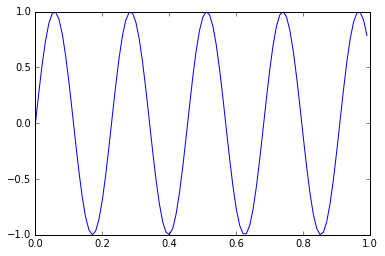

In [135]:
ipywidgets.interact(pltsin, freq=(0, 10, 0.1),__manual=True)

When interaction widget arguments depend on other widgets, use `ipywidgets.Widget.observe`. There are "traitlets", which I think get passed around when one interacts with a widget. One can link several widgets either in the Python backend, or in the JavaScript frontend.

A summary of the available widgets is [available online](https://github.com/ipython/ipywidgets/blob/d3dc17843435539e8030d08197627c858d853223/docs/source/examples/Widget%20List.ipynb), one worth paying attention to is `ipywidgets.Play` (complemented by `ipywidgets.VBox` controls), which animates by I believe stepping through a sequence of integers, but which I don't see to have available right now.

One can do all kinds of styling and layout adjustments, through the ipywidgets API, which exposes properties in the `layout` attribute. There is a generic set of properties, and each widget class may expose more specific properties e.g. the `ipywidgets.Button` exposes `button_style`.

In [147]:
wid.layout.__dict__

{'_cross_validation_lock': False,
 '_model_id': '9993c13dc8944a3e8e8b8b6ee1a4c6b4',
 '_trait_notifiers': {'config': {'change': [<traitlets.traitlets.ObserveHandler at 0x7f5d45f33550>]}},
 '_trait_validators': {},
 '_trait_values': {'_display_callbacks': <ipywidgets.widgets.widget.CallbackDispatcher at 0x7f5d1c120940>,
  '_model_module': 'jupyter-js-widgets',
  '_model_name': 'LayoutModel',
  '_view_module': 'jupyter-js-widgets',
  '_view_name': 'LayoutView',
  'align_content': '',
  'align_items': '',
  'align_self': '',
  'border': '',
  'bottom': '',
  'comm': <ipykernel.comm.comm.Comm at 0x7f5d1d08f780>,
  'config': {},
  'display': '',
  'flex': '',
  'flex_flow': '',
  'height': '',
  'justify_content': '',
  'keys': ['align_self',
   'flex',
   'height',
   'align_content',
   'right',
   'visibility',
   'left',
   'align_items',
   'width',
   'msg_throttle',
   '_model_name',
   'border',
   'min_width',
   'margin',
   'padding',
   'overflow',
   'max_width',
   'flex_flow',

A slippery slope into getting carried away by UI/UX design! Especially when layout can be done with `HBox` and `VBox`, and the Flexbox layout (which I know nothing about, but looks like some sort of a CSS framework). Actually there is a whole MVC model down there for building extensions.

A number of example notebooks are available, here's a [random graph explorer](https://github.com/ipython/ipywidgets/blob/d3dc17843435539e8030d08197627c858d853223/docs/source/examples/Exploring%20Graphs.ipynb).

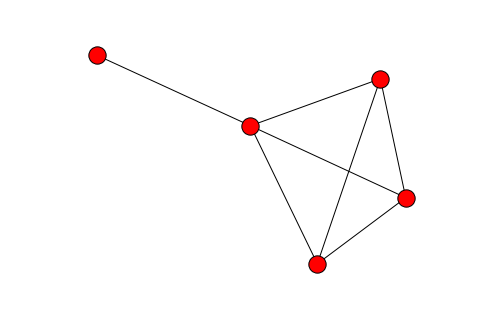

In [201]:
import networkx as nx

g = None

def random_lobster(n, m, k, p):
    return nx.random_lobster(n, p, p/m)

def powerlaw_cluster(n, m, k ,p):
    return nx.powerlaw_cluster_graph(n, m, p)

def erdos_renyi(n, m, k, p):
    return nx.erdos_renyi_graph(n, p)

def newman_watts_strogatz(n, m, k, p):
    return nx.newman_watts_strogatz_graph(n, k, p)

def plot_random_graph(n, m, k, p, generator):
    global g # also nonlocal should work here
    g = generator(n, m, k, p)
    nx.draw(g)
    matplotlib.pyplot.show()

ipywidgets.interact(plot_random_graph, n=(2, 30), m=(1, 10), k=(1, 10), p=(0.0, 1.0, 0.001),
         generator={'Lobster': random_lobster,
                    'Power law': powerlaw_cluster,
                   'Erdős-Rényi': erdos_renyi,
                   'Newman-W'})

In the above, a reference to the graph is captured in `g`, though maybe a prettier way to do so, minding scoping constraints, exists.

In [203]:
g.edges()

[(0, 2), (0, 3), (0, 4), (1, 3), (2, 3), (2, 4), (3, 4)]